In [1]:
import twitter
import pandas as pd
import matplotlib.pyplot as plt
import pandas

In [2]:
df = pandas.read_csv('/home/nessa/Downloads/Trump.csv')

In [3]:
df['text']

0       Just met with UN Secretary-General António Gut...
1       America is a Nation that believes in the power...
2       RT @SteveForbesCEO: .@realDonaldTrump speech o...
3       We grieve for the terrible loss of life, and s...
4       School shooting in Texas. Early reports not lo...
                              ...                        
3191    The failing @nytimes writes total fiction conc...
3192    I call my own shots, largely based on an accum...
3193    Any negative polls are fake news, just like th...
3194    What an amazing comeback and win by the Patrio...
3195    Enjoy the #SuperBowl and then we continue: MAK...
Name: text, Length: 3196, dtype: object

In [4]:
import re

In [5]:
# cleaning 

def remove_url(txt):
    return re.sub(r"http\S+", "", txt)
    
def remove_rt(txt):
    return re.sub(r"RT", "", txt)
      
def remove_hashtag(txt):
    return re.sub(r'#\S+','', txt)

def remove_mentions(txt):
    return re.sub(r'@\S+','', txt)

def remove_controls(txt):
    return re.sub(r'[\n\r\t\f\v]','',txt)

def remove_whitespaces(txt):
    return re.sub(r'  +',' ',txt)

def remove_whitespaces_start_end(txt):
    return re.sub(r'^\s+|\s+$','',txt)

def remove_numbers(txt):
    return re.sub(r'\d','',txt)

def remove_emojis(txt):
    return re.sub(r'&amp','',txt)

def remove_special_characters(txt):
    return re.sub(r'[^\w ]+','',txt)


function_list=[remove_whitespaces_start_end, remove_url, remove_rt, remove_controls, remove_emojis, remove_mentions, remove_hashtag, remove_whitespaces, remove_numbers, remove_special_characters]

In [6]:
for func in function_list:
    df['text'] = df['text'].apply(lambda x: func(x))

In [7]:
print(df['text'])

0       Just met with UN SecretaryGeneral António Gute...
1       America is a Nation that believes in the power...
2         speech on drug costs pays immediate dividend...
3       We grieve for the terrible loss of life and se...
4       School shooting in Texas Early reports not loo...
                              ...                        
3191    The failing writes total fiction concerning me...
3192    I call my own shots largely based on an accumu...
3193    Any negative polls are fake news just like the...
3194    What an amazing comeback and win by the Patrio...
3195    Enjoy the and then we continue MAKE AMERICA GR...
Name: text, Length: 3196, dtype: object


In [8]:
import nltk
#nltk.download()

In [9]:
from nltk.tokenize import RegexpTokenizer

In [10]:
tokenizer = RegexpTokenizer(r'\w+')
    
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [11]:
from nltk.corpus import stopwords

def remove_stopwords(x):
    return [ww for ww in x if ww not in stopwords.words('english')]

df['text'] = df['text'].apply(lambda x: remove_stopwords(x)) 

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [13]:
def word_lemmatizer(x):
    return [lemmatizer.lemmatize(ww) for ww in x]

df['text'] = df['text'].apply(lambda x: word_lemmatizer(x)) 

In [14]:
def resolve_lists(x):
    return " ".join(ww for ww in x)

In [15]:
df['text'] = df['text'].apply(lambda x: resolve_lists(x)) 

In [16]:
from textblob import TextBlob

In [17]:
def senti(x):
    return TextBlob(x).sentiment 

df['sentiment']=df['text'].apply(lambda x: senti(x).polarity)
df['subjectivity']=df['text'].apply(lambda x: senti(x).subjectivity)

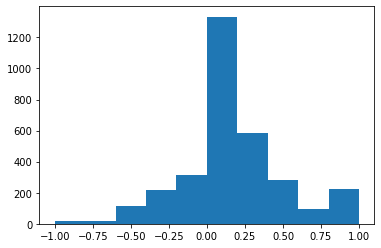

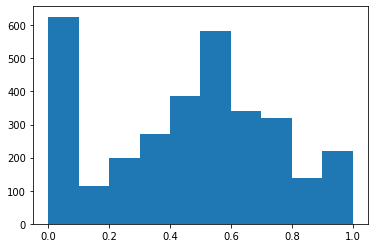

In [18]:
plt.hist(df['sentiment'])
plt.show()
plt.hist(df['subjectivity'])
plt.show()

In [19]:
df['favorite_count']

0         4550
1        10450
2            0
3        40709
4        66378
         ...  
3191     92262
3192    119843
3193    154968
3194    257578
3195    178303
Name: favorite_count, Length: 3196, dtype: int64

In [20]:
word2count = {} 
for data in df['text']: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [21]:
word2count_summary = {k: v for k, v in sorted(word2count.items(), key=lambda item: item[1],reverse=True)}
word2count_summary 

{'great': 701,
 'people': 305,
 'u': 275,
 'news': 269,
 'job': 255,
 'president': 244,
 'country': 244,
 'year': 235,
 'tax': 235,
 'fake': 226,
 'america': 225,
 'today': 224,
 'american': 220,
 'thank': 218,
 'big': 216,
 'trump': 213,
 'state': 185,
 'democrat': 184,
 'many': 183,
 'time': 182,
 'republican': 167,
 'much': 153,
 'cut': 152,
 'get': 151,
 'want': 149,
 'would': 146,
 'day': 145,
 'new': 144,
 'must': 142,
 'good': 140,
 'medium': 136,
 'make': 132,
 'border': 131,
 'house': 122,
 'honor': 118,
 'first': 118,
 'military': 117,
 'never': 116,
 'election': 115,
 'meeting': 115,
 'back': 110,
 'korea': 110,
 'vote': 107,
 'going': 107,
 'united': 106,
 'one': 106,
 'russia': 106,
 'working': 104,
 'deal': 104,
 'north': 99,
 'need': 96,
 'hard': 95,
 'even': 95,
 'national': 95,
 'dont': 93,
 'story': 92,
 'security': 92,
 'trade': 91,
 'made': 91,
 'dems': 91,
 'bill': 90,
 'china': 90,
 'like': 89,
 'nation': 87,
 'bad': 87,
 'thing': 87,
 'obama': 86,
 'win': 83,
 'e

In [22]:
top100 = list(word2count_summary.items())[0: 100]

In [24]:
comm_words=[]
for i in range(0,100):
    wd=top100[i][0]
    comm_words.append(wd)

comm_words.remove('u')
comm_words.remove('great')
comm_words.remove('people')

In [25]:
from sklearn import feature_extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer(ngram_range=(1,3), max_features=300).fit(df['text'])# change the max feature could increase the accurancy but do not know which one is the best
txt= vect.transform(df['text'])

X_tf=pd.DataFrame(txt.toarray(), columns=vect.get_feature_names())

In [27]:
X_tf_short = X_tf[comm_words]

In [28]:
X_tf_short=X_tf_short.apply(lambda x: x>=1)
X_tf_short=X_tf_short.apply(lambda x: x.astype('float'))

In [29]:
X_tf_short

,news,job,president,country,year,tax,fake,america,today,american,...,see,go,family,long,obamacare,collusion,white,daca,campaign,also
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3192,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3193,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_tf_short['likes'] = df['favorite_count'] 

In [31]:
X_tf_short=X_tf_short[X_tf_short['likes']>0]

In [32]:
Y=X_tf_short['likes'].to_numpy()
X = X_tf_short.drop(columns=['likes']).to_numpy()

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_2 = DecisionTreeRegressor(max_depth=100)
regr_3 = DecisionTreeRegressor(max_depth=50)
regr_1.fit(X, Y)
regr_2.fit(X, Y)
regr_3.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)

In [35]:
import numpy as np

In [36]:
np.mean((y_1-Y)**2)
np.mean((y_2-Y)**2)
np.mean((y_3-Y)**2)

527251654.5970329

In [295]:
from sklearn.feature_extraction.text import CountVectorizer

In [322]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [323]:
vec = CountVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values).toarray()

In [345]:
n_clusters = 2
cls = KMeans(n_clusters=n_clusters)
cls.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [346]:
clusters = cls.predict(features)

In [347]:
max(clusters)

1

In [348]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

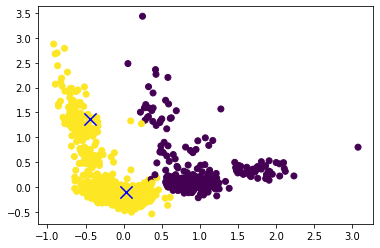

In [349]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.fit_predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.show()

In [350]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))


0.030163085468827778

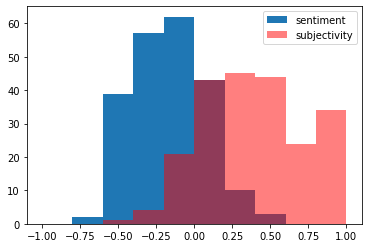

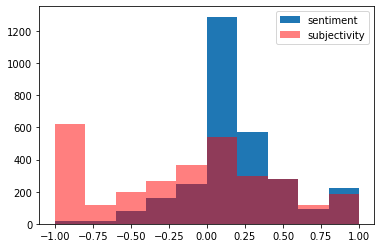

In [352]:
for ii in range(n_clusters):
    cluster = df['text'][clusters==ii]
    _ = plt.hist(cluster.apply(lambda x: senti(x).polarity),label='sentiment',bins=np.linspace(-1,1,11))
    _ = plt.hist(cluster.apply(lambda x: (senti(x).subjectivity-0.5)*2),label='subjectivity',alpha=0.5,color='red',bins=np.linspace(-1,1,11))
    plt.legend()
    plt.show()